In [68]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
country_mapping = pd.read_excel(r"C:\Users\pingk\Downloads\fadhli nitip\country_mapping.xlsx")
country_2digit = pd.read_excel(r"C:\Users\pingk\Downloads\fadhli nitip\country_2digit.xlsx")
provincial_code = pd.read_excel(r"C:\Users\pingk\Downloads\fadhli nitip\provincial code.xlsx")
three_group_precipitation = pd.read_excel(r"C:\Users\pingk\Downloads\fadhli nitip\three_group_precipitation.xlsx")
four_group_precipitation = pd.read_excel(r"C:\Users\pingk\Downloads\fadhli nitip\four_group_precipitation.xlsx")
island_mapping = pd.read_excel(r"C:\Users\pingk\Downloads\fadhli nitip\island code.xlsx")
thai_mapping = pd.read_excel(r"C:\Users\pingk\Downloads\fadhli nitip\thai_vs_nothai.xlsx")

data_rt4 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\fadhli nitip\csv\data_rt4_raw_nodrop_removedbadfiles.csv")
data_rt1 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\fadhli nitip\csv\data_rt1_raw_nodrop.csv")
data_rt3a = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\fadhli nitip\csv\data_rt3_raw_nodrop_a.csv")
data_rt3b = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\fadhli nitip\csv\data_rt3_raw_nodrop_b.csv")
data_rt6 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\fadhli nitip\csv\data_rt6_raw_nodrop.csv")
data_rt11 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\fadhli nitip\csv\data_rt11_raw_nodrop.csv")

In [69]:
# Inspect the first few rows of each dataset
print("Raw Data:")
print(data_rt4.head())
print(country_mapping.head())
print(country_2digit.head())
print(provincial_code.head())
print(three_group_precipitation.head())
print(four_group_precipitation.head())
print(island_mapping.head())
print(thai_mapping.head())


Raw Data:
  prov_char  country_code country_char               wavenumber   649.893  \
0       BBX             1           ID  ID-BBX-068-2307-031_001  0.016094   
1       BBX             1           ID  ID-BBX-068-2307-031_002  0.013664   
2       BBX             1           ID  ID-BBX-068-2307-031_003  0.015954   
3       BBX             1           ID  ID-BBX-068-2307-031_004  0.013254   
4       BBX             1           ID  ID-BBX-068-2307-031_005  0.014003   

    650.376   650.858    651.34   651.822   652.304  ...  3995.783  3996.265  \
0  0.016946  0.017469  0.017538  0.017089  0.016154  ...  0.000476  0.000609   
1  0.013097  0.012600  0.012208  0.011938  0.011801  ...  0.000951  0.001064   
2  0.016134  0.015986  0.015469  0.014614  0.013532  ...  0.000755  0.000871   
3  0.012653  0.011752  0.010722  0.009749  0.008982  ...  0.001851  0.001925   
4  0.013402  0.012824  0.012274  0.011728  0.011171  ...  0.002461  0.002472   

   3996.747   3997.23  3997.712  3998.194  399

In [70]:
# Merge data_rt4 with provincial_code on 'prov_char'
data_rt4_with_prov_code = pd.merge(data_rt4, provincial_code, how='left', left_on='prov_char', right_on='prov_char')

# Merge the result with three_group_precipitation
data_rt4_with_3precip = pd.merge(data_rt4_with_prov_code, three_group_precipitation, how='left', left_on='prov_char', right_on='prov_char')

# Merge the result with four_group_precipitation
data_rt4_with_3p4p = pd.merge(data_rt4_with_3precip, four_group_precipitation, how='left', left_on='prov_char', right_on='prov_char')

# Merge the result with country_mapping
data_rt4_with_countryname = pd.merge(data_rt4_with_3p4p, country_mapping, how='left', left_on='country_code', right_on='country_code')

# Merge the result with thai_mapping
data_rt4_with_thai = pd.merge(data_rt4_with_countryname, thai_mapping, how='left', left_on='country_char', right_on='country_char')

# Merge the result with island_mapping
data_rt4_with_sixcat = pd.merge(data_rt4_with_thai, island_mapping, how='left', left_on='prov_char', right_on='prov_char')

In [71]:
# Inspect the first few rows of each dataset
print("Data with Additional Groupings:")
print(data_rt4_with_sixcat.head())

Data with Additional Groupings:
  prov_char  country_code country_char               wavenumber   649.893  \
0       BBX             1           ID  ID-BBX-068-2307-031_001  0.016094   
1       BBX             1           ID  ID-BBX-068-2307-031_002  0.013664   
2       BBX             1           ID  ID-BBX-068-2307-031_003  0.015954   
3       BBX             1           ID  ID-BBX-068-2307-031_004  0.013254   
4       BBX             1           ID  ID-BBX-068-2307-031_005  0.014003   

    650.376   650.858    651.34   651.822   652.304  ...  prov_code  \
0  0.016946  0.017469  0.017538  0.017089  0.016154  ...         17   
1  0.013097  0.012600  0.012208  0.011938  0.011801  ...         17   
2  0.016134  0.015986  0.015469  0.014614  0.013532  ...         17   
3  0.012653  0.011752  0.010722  0.009749  0.008982  ...         17   
4  0.013402  0.012824  0.012274  0.011728  0.011171  ...         17   

   three_group_precip  tgp_name  dgp_name  four_group_precip  fgp_name  \
0   

In [72]:
data_rt4_with_sixcat.to_csv('C:/Users/pingk/Downloads/fadhli nitip/data_rt4.csv', index=False)

In [73]:
print(data_rt4_with_sixcat)

    prov_char  country_code country_char                      wavenumber  \
0         BBX             1           ID         ID-BBX-068-2307-031_001   
1         BBX             1           ID         ID-BBX-068-2307-031_002   
2         BBX             1           ID         ID-BBX-068-2307-031_003   
3         BBX             1           ID         ID-BBX-068-2307-031_004   
4         BBX             1           ID         ID-BBX-068-2307-031_005   
..        ...           ...          ...                             ...   
432       TRG             0           TH  TH-TRG-012-2312-004_008_h2opik   
433       TRG             0           TH  TH-TRG-012-2312-004_009_h2opik   
434       TRG             0           TH         TH-TRG-018-2311-001_001   
435       TRG             0           TH         TH-TRG-018-2311-001_002   
436       TRG             0           TH         TH-TRG-018-2311-001_003   

      649.893   650.376   650.858    651.34   651.822   652.304  ...  \
0    0.016094  

In [74]:
# Print the filtered numeric columns in one line
a = data_rt4_with_sixcat.drop(
        columns=[
            col for col in data_rt4_with_sixcat.columns 
            if col in ['country_code', 'prov_code', 'three_group_precip', 'four_group_precip', 'th_vs_noth', 'island_code'] 
            #or (col.replace('.', '', 1).isdigit() and any(float(col) >= start and float(col) < end for start, end in [(3100, 4001), (1870, 2700)]))
            #or (col.replace('.', '', 1).isdigit() and 822.01 <= float(col) < 879.99)
        ]
    ).select_dtypes(include=['number'])

print(a)

      649.893   650.376   650.858    651.34   651.822   652.304   652.786  \
0    0.016094  0.016946  0.017469  0.017538  0.017089  0.016154  0.014849   
1    0.013664  0.013097  0.012600  0.012208  0.011938  0.011801  0.011799   
2    0.015954  0.016134  0.015986  0.015469  0.014614  0.013532  0.012372   
3    0.013254  0.012653  0.011752  0.010722  0.009749  0.008982  0.008484   
4    0.014003  0.013402  0.012824  0.012274  0.011728  0.011171  0.010621   
..        ...       ...       ...       ...       ...       ...       ...   
432  0.012609  0.012128  0.011822  0.011794  0.012111  0.012778  0.013739   
433  0.014162  0.014071  0.014099  0.014314  0.014771  0.015495  0.016470   
434  0.012689  0.012621  0.012210  0.011603  0.010994  0.010581  0.010496   
435  0.013717  0.013979  0.014267  0.014573  0.014852  0.015038  0.015085   
436  0.008438  0.008271  0.008231  0.008409  0.008851  0.009550  0.010458   

      653.268    653.75   654.232  ...  3995.783  3996.265  3996.747  \
0  

In [75]:
# Input your dataset here

asik  = data_rt4_with_sixcat.drop(
        columns=[
            col for col in data_rt4_with_sixcat.columns 
            if col in ['country_code', 'prov_code', 'three_group_precip', 'four_group_precip', 'th_vs_noth', 'island_code'] 
            #or (col.replace('.', '', 1).isdigit() and any(float(col) >= start and float(col) < end for start, end in [(3100, 4001), (1870, 2700)]))
            #or (col.replace('.', '', 1).isdigit() and 822.01 <= float(col) < 879.99)
        ]
    )

asik.to_csv('C:/Users/pingk/Downloads/fadhli nitip/asik.csv', index=False)

In [76]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess the data
def preprocess_data(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns, index=df.index)
    
    # Log transform the data to reduce skewness
    df_log_transformed = np.log1p(df_imputed)
    
    # Scale the data using StandardScaler
    scaler = RobustScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_log_transformed), columns=df_numeric.columns, index=df.index)
    
    # Replace the original numeric columns with the processed ones
    df[numeric_cols] = df_scaled
    return df

# Function to remove outliers
def remove_outliers(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    
    # Apply IsolationForest to remove outliers
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(df_numeric)
    mask = yhat != -1
    
    # Filter the original dataframe using the mask
    df_cleaned = df[mask].reset_index(drop=True)
    return df_cleaned

# Function to drop columns within specified ranges
def drop_columns_within_ranges(df, ranges):
    def is_within_ranges(col_name, ranges):
        try:
            col_value = float(col_name)
            return any(start <= col_value < end for start, end in ranges)
        except ValueError:
            return False

    columns_to_drop = [col for col in df.columns if is_within_ranges(col, ranges)]
    df_dropped = df.drop(columns=columns_to_drop)
    return df_dropped

# Specify the ranges
ranges_to_drop = [
    (3100, 4001), 
    (1870, 2700),
    #(879.99, 822.01)
    ]



# Drop columns within the specified ranges
ftir_data_rt4_filtered = drop_columns_within_ranges(
    asik, 
                                                    ranges_to_drop
                                                    )

# Preprocess the data
ftir_data_rt4_preprocessed = preprocess_data(ftir_data_rt4_filtered)

# Remove outliers
ftir_data_rt4_no_outliers = remove_outliers(ftir_data_rt4_preprocessed)



In [77]:
ftir_data_rt4_preprocessed

,prov_char,country_char,wavenumber,649.893,650.376,650.858,651.34,651.822,652.304,652.786,...,3097.6,3098.082,3098.564,3099.046,3099.528,tgp_name,dgp_name,fgp_name,country_name,thnoth_name
0,BBX,ID,ID-BBX-068-2307-031_001,0.301913,0.524294,0.653665,0.708913,0.611386,0.456521,0.150042,...,-0.387058,-0.347153,-0.300564,-0.267272,-0.198401,Group 3,Group 2,Group 3,Indonesia,Non-Thai
1,BBX,ID,ID-BBX-068-2307-031_002,-0.250035,-0.382790,-0.538276,-0.592073,-0.662562,-0.639372,-0.605932,...,-0.066616,-0.032237,0.000518,0.020940,0.041270,Group 3,Group 2,Group 3,Indonesia,Non-Thai
2,BBX,ID,ID-BBX-068-2307-031_003,0.270245,0.333278,0.291342,0.204725,0.000000,-0.203128,-0.463653,...,-0.666719,-0.649533,-0.635463,-0.659611,-0.625226,Group 3,Group 2,Group 3,Indonesia,Non-Thai
3,BBX,ID,ID-BBX-068-2307-031_004,-0.343209,-0.487741,-0.746363,-0.955952,-1.205718,-1.351465,-1.430125,...,0.324564,0.309801,0.298547,0.293741,0.276471,Group 3,Group 2,Group 3,Indonesia,Non-Thai
4,BBX,ID,ID-BBX-068-2307-031_005,-0.172798,-0.310888,-0.483359,-0.575967,-0.714585,-0.798333,-0.898504,...,-0.112999,-0.087393,-0.068261,-0.064129,-0.045822,Group 3,Group 2,Group 3,Indonesia,Non-Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,TRG,TH,TH-TRG-012-2312-004_008_h2opik,-0.489886,-0.611791,-0.729264,-0.693343,-0.619587,-0.392900,-0.124811,...,4.796651,4.772123,4.743732,4.898039,4.658065,Group 2,Group 1,Group 2,Thailand,Thai
433,TRG,TH,TH-TRG-012-2312-004_009_h2opik,-0.136699,-0.152802,-0.170817,-0.077255,0.038855,0.290915,0.550927,...,6.043476,6.057671,6.054247,6.263134,5.935969,Group 2,Group 1,Group 2,Thailand,Thai
434,TRG,TH,TH-TRG-018-2311-001_001,-0.471824,-0.495309,-0.633915,-0.740269,-0.896739,-0.947446,-0.929579,...,-0.169375,-0.170363,-0.153105,-0.131963,-0.077934,Group 2,Group 1,Group 2,Thailand,Thai
435,TRG,TH,TH-TRG-018-2311-001_002,-0.237811,-0.174504,-0.129440,-0.013830,0.058765,0.176049,0.208429,...,-0.269544,-0.327496,-0.368342,-0.407709,-0.375128,Group 2,Group 1,Group 2,Thailand,Thai


In [78]:
print(ftir_data_rt4_no_outliers)

    prov_char country_char                      wavenumber   649.893  \
0         BBX           ID         ID-BBX-068-2307-031_001  0.301913   
1         BBX           ID         ID-BBX-068-2307-031_002 -0.250035   
2         BBX           ID         ID-BBX-068-2307-031_003  0.270245   
3         BBX           ID         ID-BBX-068-2307-031_004 -0.343209   
4         BBX           ID         ID-BBX-068-2307-031_005 -0.172798   
..        ...          ...                             ...       ...   
410       TRG           TH  TH-TRG-012-2312-004_008_h2opik -0.489886   
411       TRG           TH  TH-TRG-012-2312-004_009_h2opik -0.136699   
412       TRG           TH         TH-TRG-018-2311-001_001 -0.471824   
413       TRG           TH         TH-TRG-018-2311-001_002 -0.237811   
414       TRG           TH         TH-TRG-018-2311-001_003 -1.441517   

      650.376   650.858    651.34   651.822   652.304   652.786  ...  \
0    0.524294  0.653665  0.708913  0.611386  0.456521  0.150042

In [79]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(ftir_data_rt4_no_outliers)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Merge the PCA components DataFrame with the country information
merged_pca_df = pd.concat([pca_df.reset_index(drop=True), data_rt4_with_sixcat[['country_code', 'country_name']].reset_index(drop=True)], axis=1)

# Save the PCA results
# merged_pca_df.to_csv('path/to/your/pca_components_with_country.csv', index=False)

# Plot the PCA results with colors based on clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_pca_df, x='PC1', y='PC2', hue='country_code', palette='viridis', s=100)

# Customize the legend to show country names instead of codes
handles, labels = plt.gca().get_legend_handles_labels()
country_code_to_name = dict(zip(merged_pca_df['country_code'], merged_pca_df['country_name']))
updated_labels = [country_code_to_name[int(label)] if label.isdigit() else label for label in labels]
plt.legend(handles, updated_labels, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of FTIR Data Colored by Clusters')
plt.show()

# Optional: Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


ValueError: could not convert string to float: 'BBX'

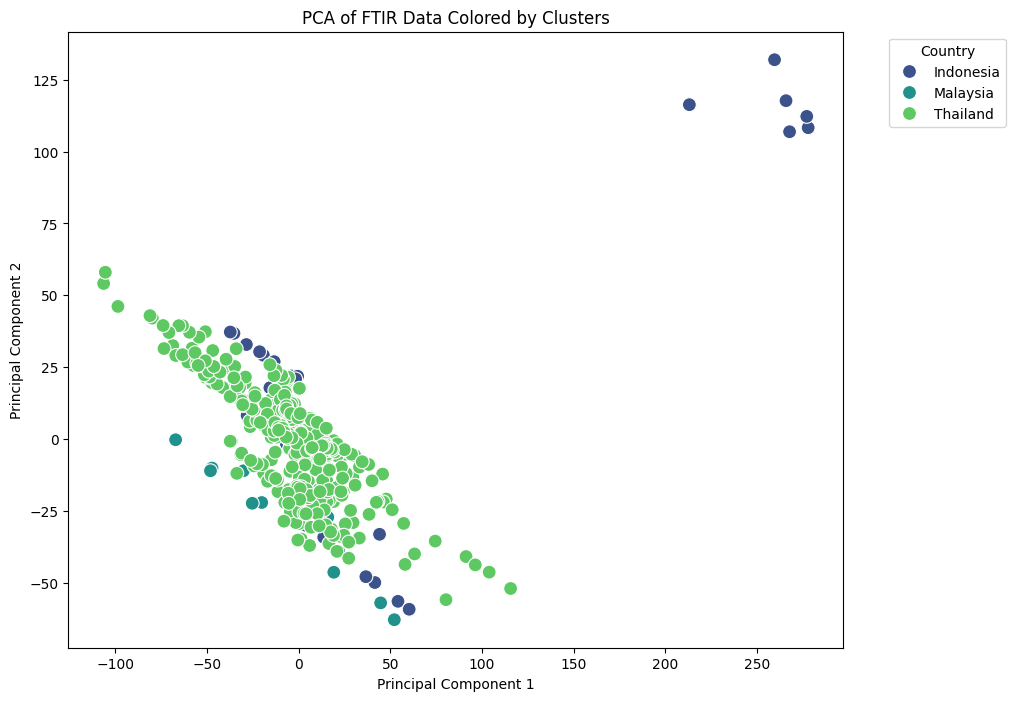

Explained Variance Ratio: [0.53408744 0.17592755]


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to preprocess the data
def preprocess_data(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns, index=df.index)
    
    # Log transform the data to reduce skewness
    df_log_transformed = np.log1p(df_imputed)
    
    # Scale the data using RobustScaler
    scaler = RobustScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_log_transformed), columns=df_numeric.columns, index=df.index)
    
    # Replace the original numeric columns with the processed ones
    df[numeric_cols] = df_scaled
    return df

# Function to remove outliers
def remove_outliers(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    
    # Apply IsolationForest to remove outliers
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(df_numeric)
    mask = yhat != -1
    
    # Filter the original dataframe using the mask
    df_cleaned = df[mask].reset_index(drop=True)
    return df_cleaned

# Function to drop columns within specified ranges
def drop_columns_within_ranges(df, ranges):
    def is_within_ranges(col_name, ranges):
        try:
            col_value = float(col_name)
            return any(start <= col_value < end for start, end in ranges)
        except ValueError:
            return False

    columns_to_drop = [col for col in df.columns if is_within_ranges(col, ranges)]
    df_dropped = df.drop(columns=columns_to_drop)
    return df_dropped

# Function to apply PCA and clustering
def apply_pca_and_clustering(df, n_components=2, n_clusters=3):
    # Select numeric columns for PCA
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df_numeric)
    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(pca_result)
    
    # Add PCA components and clusters to the original DataFrame
    df[f'PC1'] = pca_result[:, 0]
    df[f'PC2'] = pca_result[:, 1]
    df['Cluster'] = clusters
    
    return df, pca


# Specify the ranges
ranges_to_drop = [
    (3100, 4001), 
    (1870, 2700),
    #(822.01, 879.99)
]

# Drop columns within the specified ranges
data_filtered = drop_columns_within_ranges(asik, ranges_to_drop)

# Preprocess the data
data_preprocessed = preprocess_data(data_filtered)

# Remove outliers
data_no_outliers = remove_outliers(data_preprocessed)

# Apply PCA and clustering
data_final, pca = apply_pca_and_clustering(data_no_outliers)

# Plot the PCA results with colors based on clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data_final, x='PC1', y='PC2', hue='country_char', palette='viridis', s=100)

# Customize the legend to show country names instead of codes
handles, labels = plt.gca().get_legend_handles_labels()
country_char_to_name = dict(zip(data_final['country_char'], data_final['country_name']))
updated_labels = [country_char_to_name[label] if label in country_char_to_name else label for label in labels]
plt.legend(handles, updated_labels, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of FTIR Data Colored by Clusters')
plt.show()

# Optional: Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


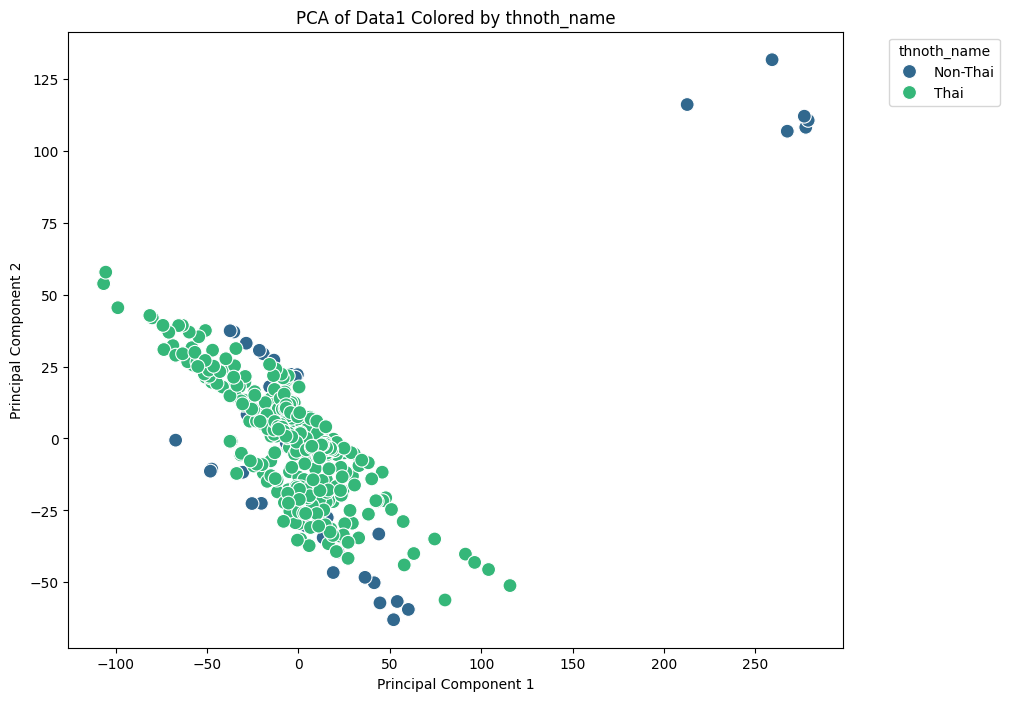

Explained Variance Ratio: [0.53700229 0.17435342]


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess the data1
def preprocess_data1(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns, index=df.index)
    
    # Log transform the data1 to reduce skewness
    df_log_transformed = np.log1p(df_imputed)
    
    # Scale the data1 using StandardScaler
    scaler = RobustScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_log_transformed), columns=df_numeric.columns, index=df.index)
    
    # Replace the original numeric columns with the processed ones
    df[numeric_cols] = df_scaled
    return df

# Function to remove outliers
def remove_outliers1(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(df_numeric)
    mask = yhat != -1
    df_cleaned = df[mask].reset_index(drop=True)
    return df_cleaned

# Function to drop columns within specified ranges
def drop_columns_within_ranges(df, ranges):
    def is_within_ranges(col_name, ranges):
        try:
            col_value = float(col_name)
            return any(start <= col_value < end for start, end in ranges)
        except ValueError:
            return False

    columns_to_drop = [col for col in df.columns if is_within_ranges(col, ranges)]
    df_dropped = df.drop(columns=columns_to_drop)
    return df_dropped

# Function to apply KMeans clustering and then PCA
def apply_kmeans_and_pca(df, n_clusters=2, n_components=2):
    # Select numeric columns for clustering
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df_numeric)
    df['Cluster'] = clusters
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df_numeric)
    
    # Add PCA components to the Data1Frame
    df[f'PC1'] = pca_result[:, 0]
    df[f'PC2'] = pca_result[:, 1]
    
    # Add cluster labels to the Data1Frame
    

    return df, pca


# Specify the ranges
ranges_to_drop = [
    (3100, 4001), 
    (1870, 2700),
    #(822.01, 879.99)
]

# Drop columns within the specified ranges
data1_filtered = drop_columns_within_ranges(asik, ranges_to_drop)

# Preprocess the data1
data1_preprocessed = preprocess_data1(data1_filtered)

# Remove outliers
data1_no_outliers = remove_outliers1(data1_preprocessed)

# Apply KMeans clustering and then PCA
data1_final, pca = apply_kmeans_and_pca(data1_no_outliers, n_clusters=3)

# Plot the PCA results with colors based on clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data1_final, x='PC1', y='PC2', hue='thnoth_name', palette='viridis', s=100)

# Customize the legend to show cluster labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title='thnoth_name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Data1 Colored by thnoth_name')
plt.show()

# Optional: Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
